# Principal Component Analysis (PCA)
This notebook demonstrates PCA on a Wine dataset from sklearn.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Load and Prepare the Data

In [39]:
wine = load_wine()
X = wine.data
y = wine.target
n_clusters = len(np.unique(y))
print(f"Feature names: {wine.feature_names}")
print(f"Number of classes: {n_clusters}")


Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Number of classes: 3


## Data preprossing

In [40]:
X = StandardScaler().fit_transform(X)

## Visualize with random two features

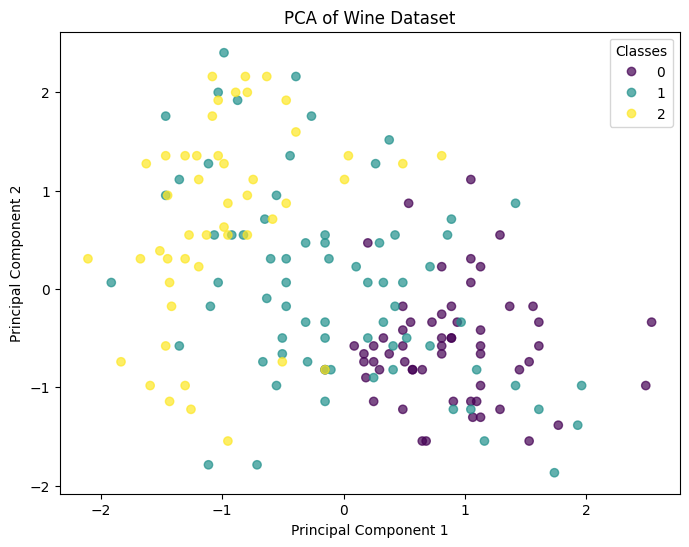

In [43]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(X[:,5], X[:,7], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset')
plt.legend(*scatter.legend_elements(), title='Classes')
plt.show()

## Apply PCA and Visualize the First Two Principal Components

In [41]:
pca = PCA(n_components=13)
X_pca = pca.fit_transform(X)

# show the which features are most important as feature names
for i, feature in enumerate(wine.feature_names):
    print(f"Feature {i+1}: {feature}, explained variance: {pca.explained_variance_ratio_[i]}")


Feature 1: alcohol, explained variance: 0.36198848099926345
Feature 2: malic_acid, explained variance: 0.1920749025700894
Feature 3: ash, explained variance: 0.1112363053624998
Feature 4: alcalinity_of_ash, explained variance: 0.07069030182714027
Feature 5: magnesium, explained variance: 0.06563293679648596
Feature 6: total_phenols, explained variance: 0.049358233192225695
Feature 7: flavanoids, explained variance: 0.04238679322623321
Feature 8: nonflavanoid_phenols, explained variance: 0.02680748948378866
Feature 9: proanthocyanins, explained variance: 0.022221534047897097
Feature 10: color_intensity, explained variance: 0.019300190939440808
Feature 11: hue, explained variance: 0.017368356899899108
Feature 12: od280/od315_of_diluted_wines, explained variance: 0.012982325756042128
Feature 13: proline, explained variance: 0.007952148898994493


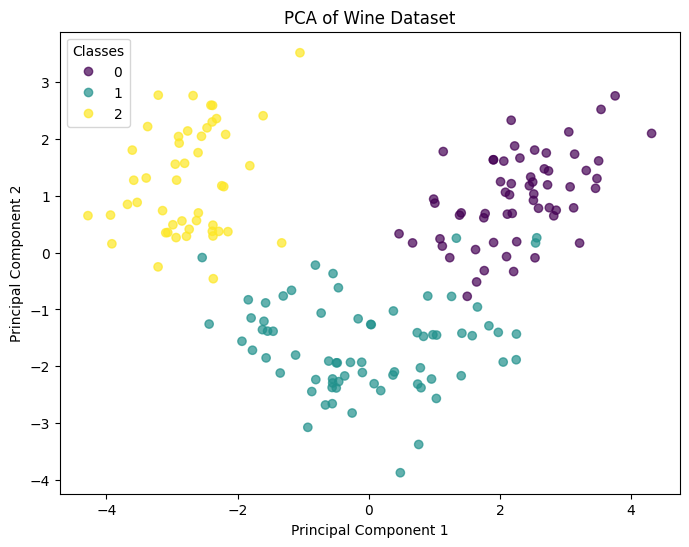

In [42]:
plt.figure(figsize=(8,6))

scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset')
plt.legend(*scatter.legend_elements(), title='Classes')
plt.show()

## Analysis and Discussion
The data is preprocessed using standard scaling to normalize the features so that it could be make the data less dense. Initial visualizations are performed using two random features to observe class separability. PCA is then applied to reduce the dimensionality of the dataset, and the explained variance of each principal component is analyzed to identify the most significant features. Finally, the first two principal components are visualized to observe how well the classes are separated in the reduced dimensional space. PCA is projecting higher dimension data into low dimension while trying to maintain the spacial relation (variance) of original. As shown above, the figure using the top two PCA preserve the variance quite well so that the relation can be well visualized. On the other hand, the figure with two randomly picked features does not show how each classes distinquish to another quite well as there aren't a clear boundary that you can use to seperate each cluster.